In [2]:
#pip install matplotlib

In [3]:
#pip install seaborn

In [4]:
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import requests

In [5]:
# csv_file = requests.get('https://github.com/pik1989/EDAforHealthcare/blob/main/Data.csv')
# content = csv_file.content
# csvfile = open('data.csv', 'wb')
# csvfile.write(content)
# csv_file.close()

In [6]:
data = pd.read_csv(r'E:\Python\Healthcare\data.csv')
data.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [7]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [8]:
data.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [9]:
data.shape

(110527, 14)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [11]:
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [12]:
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay']).dt.date.astype('datetime64[ns]')
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay']).dt.date.astype('datetime64[ns]')
data.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [13]:
data['PatientId'].value_counts()

PatientId
8.221460e+14    88
9.963767e+10    84
2.688610e+13    70
3.353480e+13    65
2.584240e+11    62
                ..
2.367500e+11     1
1.744680e+14     1
7.978390e+12     1
5.595420e+13     1
1.557660e+13     1
Name: count, Length: 61744, dtype: int64

In [14]:
# 5 is Saturday, 6 is Sunday 

data['sch_weekday'] = data['ScheduledDay'].dt.dayofweek
data['app_weekday'] = data['AppointmentDay'].dt.dayofweek

In [15]:
data['sch_weekday'].value_counts()

sch_weekday
1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: count, dtype: int64

In [16]:
data.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'}, inplace=True)

In [17]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived', 'NoShow',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [18]:
data.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis=1, inplace=True)

In [19]:
data.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,4,4
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,4,4


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  int64         
 5   Hypertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handicap        110527 non-null  int64         
 9   SMSReceived     110527 non-null  int64         
 10  NoShow          110527 non-null  object        
 11  sch_weekday     110527 non-null  int32         
 12  app_weekday     110527 non-null  int32         
dtypes: datetime64[ns](2), int32(2), int64(7), object(2)
memory usage: 10.1+ MB


In [21]:
data['Gender'].describe()

count     110527
unique         2
top            F
freq       71840
Name: Gender, dtype: object

count     110527
unique         2
top           No
freq       88208
Name: NoShow, dtype: object


Text(0, 0.5, 'Count')

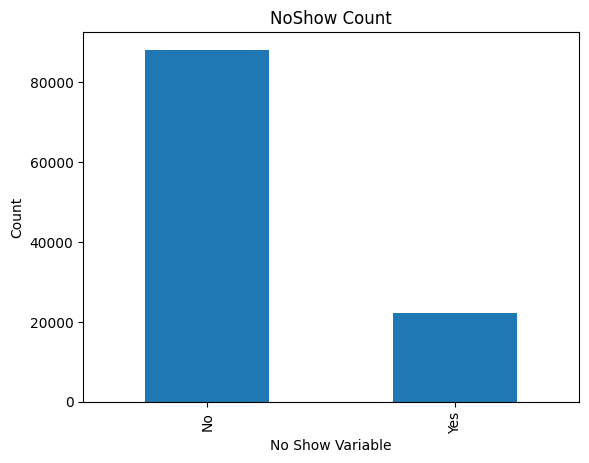

In [22]:
noShowDesc = data['NoShow'].describe()
print(noShowDesc)
data['NoShow'].value_counts().plot(kind='bar', title='NoShow Count')
#yes = data[data['NoShow']=='Yes'].value_counts()
#print("Yes : ", yes.count())
#no = data[data['NoShow']=='No'].value_counts()
#print("No : ", no.count())
plt.xlabel('No Show Variable')
plt.ylabel('Count')

In [23]:
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
#sns.pointplot(data=missing, y="percentage")
#plt.figure(figsize=(16,5))
#ax = sns.pointplot(x='index', y=0, data=missing)
#plt.xticks(rotation =90,fontsize =7)
#plt.title("Percentage of Missing values")
#plt.ylabel("PERCENTAGE")
#plt.show()
missing

,index,0
0,Gender,0.0
1,ScheduledDay,0.0
2,AppointmentDay,0.0
3,Age,0.0
4,Scholarship,0.0
5,Hypertension,0.0
6,Diabetes,0.0
7,Alcoholism,0.0
8,Handicap,0.0
9,SMSReceived,0.0


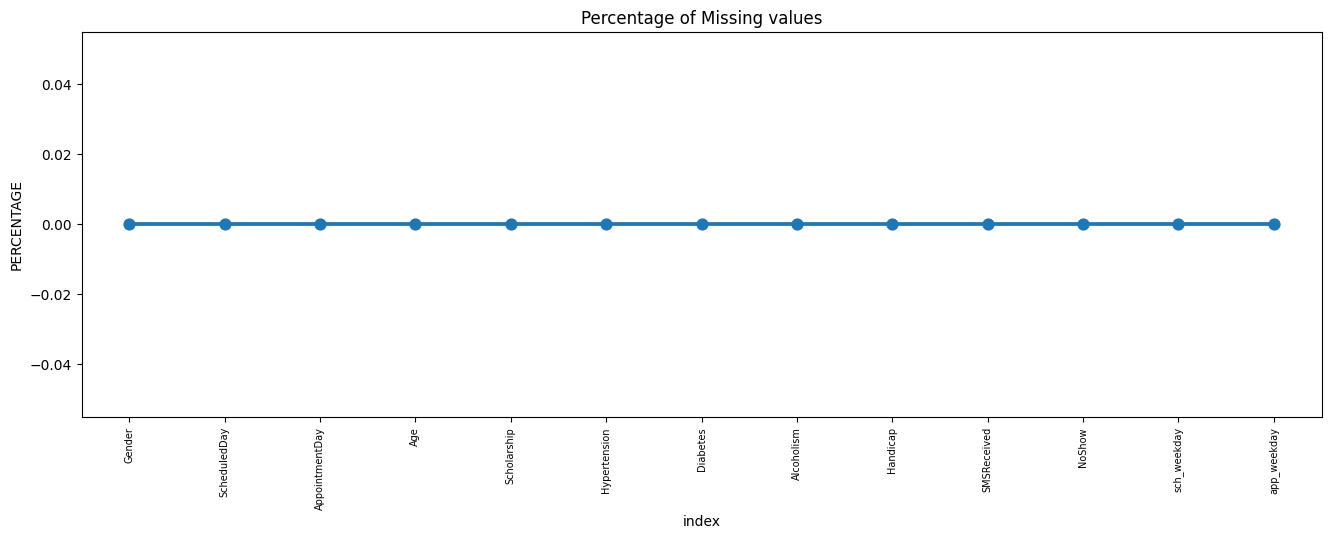

In [24]:
plt.figure(figsize=(16,5))
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
sns.pointplot(x='index', y = 0, data=missing)
plt.show()

Missing Data - Initial Intuition
Here, we don't have any missing data.
General Thumb Rules:
For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values.

# To get exact row-number of single occurrence
# row-number = df[df["LastName" == 'Smith']].index[0]

# To get exact row-number of multiple occurrence of 'Smith'
# row-number = df[df["LastName" == 'Smith']].index.tolist()

In [25]:
# Remove the data that are not compatible such as age < 0
row_num = data[data['Age']<0].index[0]
data.drop(row_num, inplace=True)

In [26]:
#rNum = data[data['Age']==0].index.tolist()
#for i in range(0, len(rNum)):
#    print(data.loc[rNum[i]])

---------- Gender ----------
Gender
F    71839
M    38687
Name: count, dtype: int64
Gender
F    64.997376
M    35.002624
Name: count, dtype: float64
---------- ScheduledDay ----------
ScheduledDay
2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
              ... 
2016-04-16       1
2016-01-28       1
2015-11-10       1
2016-03-19       1
2016-03-05       1
Name: count, Length: 111, dtype: int64
ScheduledDay
2016-05-03    3.834392
2016-05-02    3.814487
2016-05-16    3.727630
2016-05-05    3.705011
2016-05-10    3.640772
                ...   
2016-04-16    0.000905
2016-01-28    0.000905
2015-11-10    0.000905
2016-03-19    0.000905
2016-03-05    0.000905
Name: count, Length: 111, dtype: float64
---------- AppointmentDay ----------
AppointmentDay
2016-06-06    4691
2016-05-16    4613
2016-05-09    4520
2016-05-30    4514
2016-06-08    4479
2016-05-11    4474
2016-06-01    4464
2016-06-07    4416
2016-05-12    4394
2016-05-02    4376
2016-0

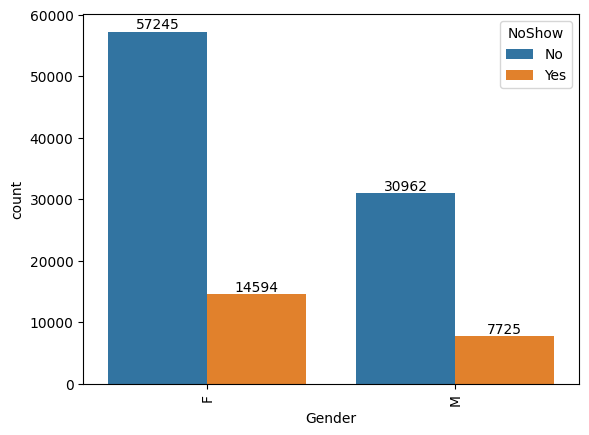

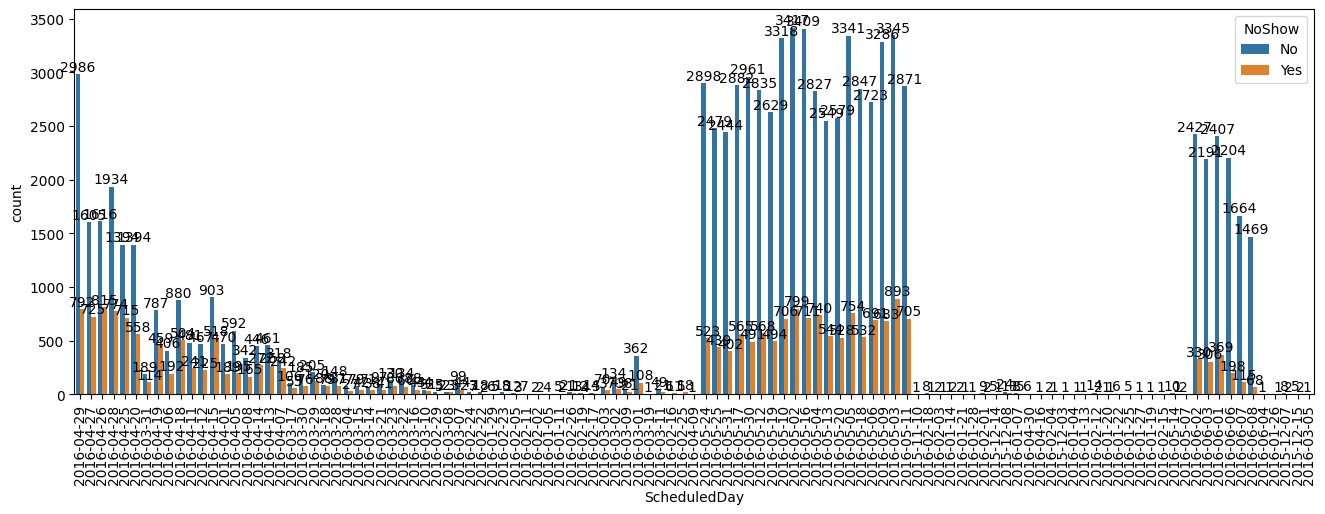

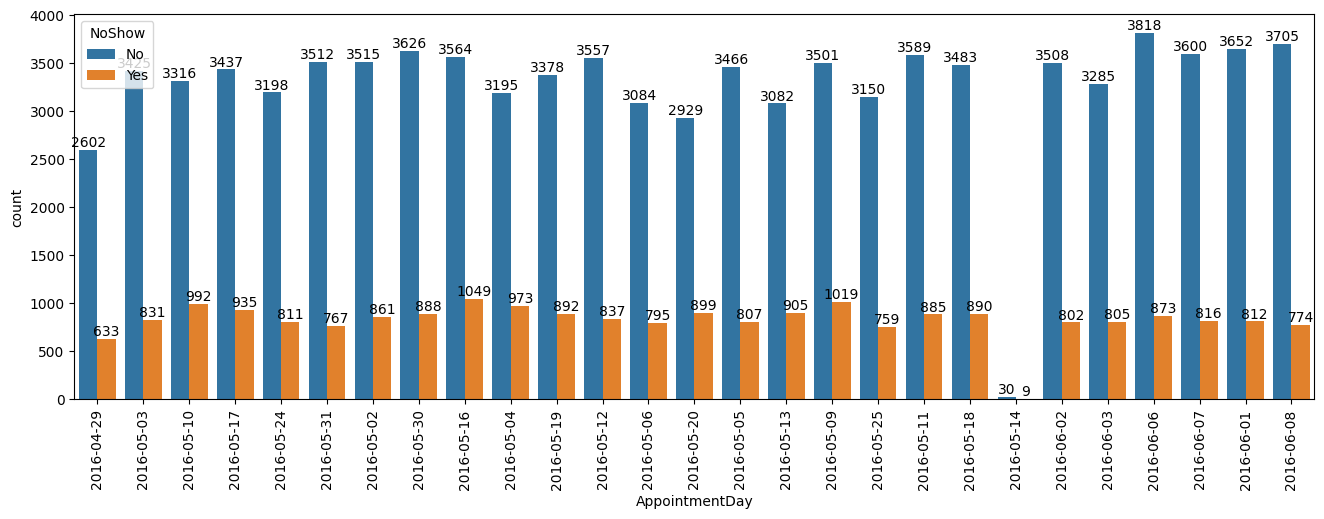

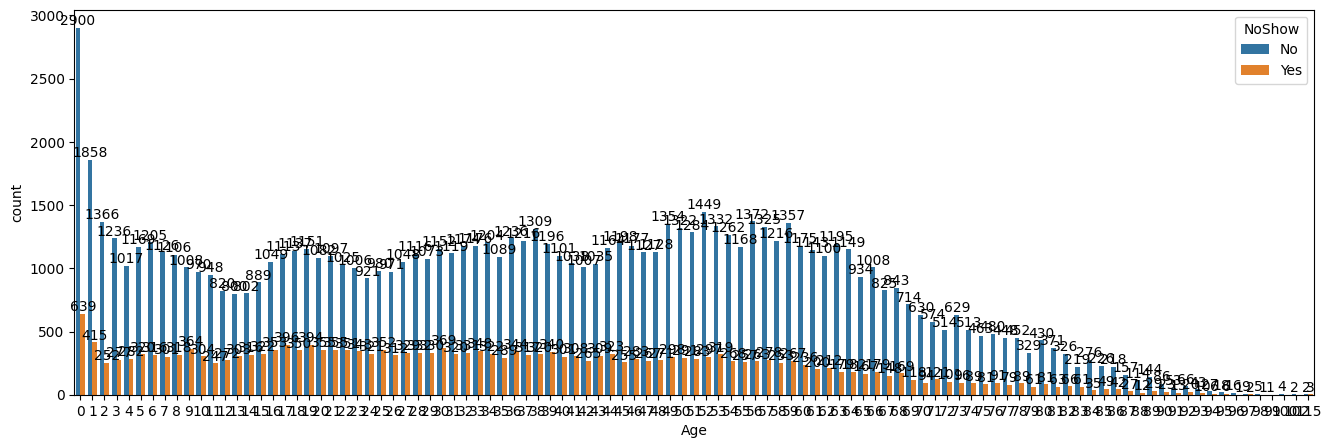

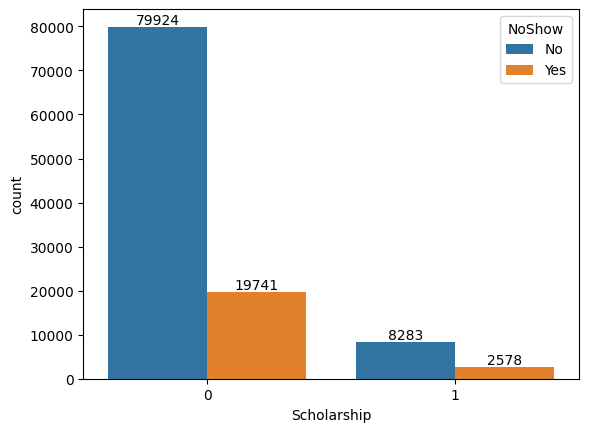

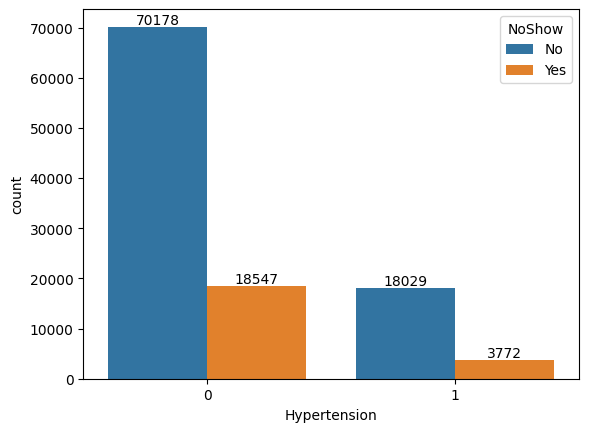

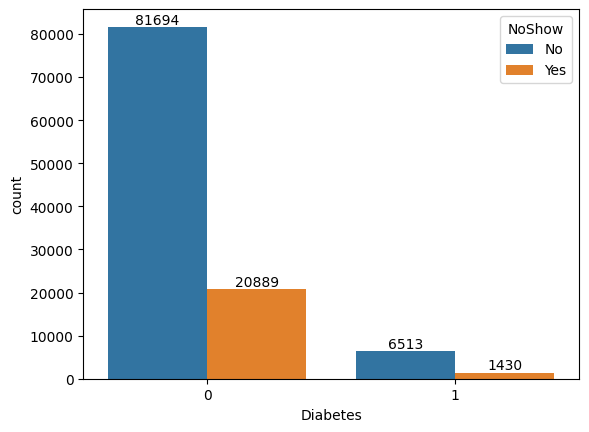

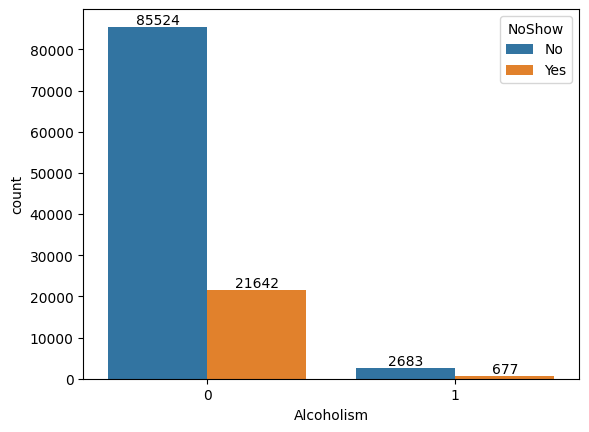

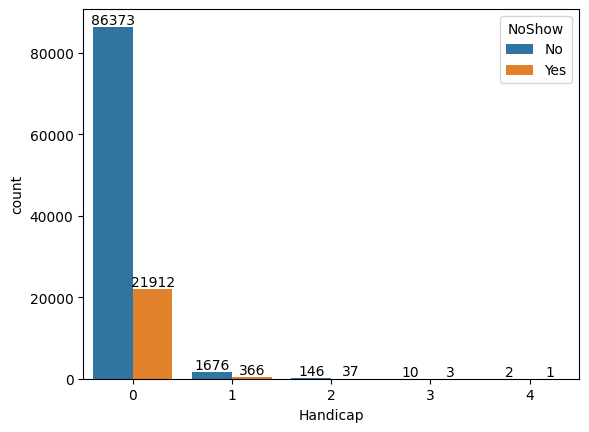

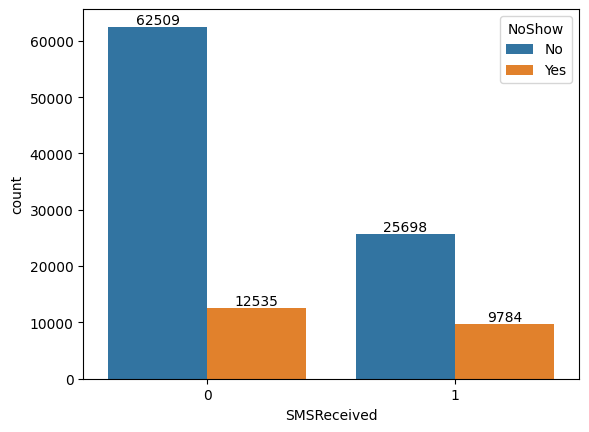

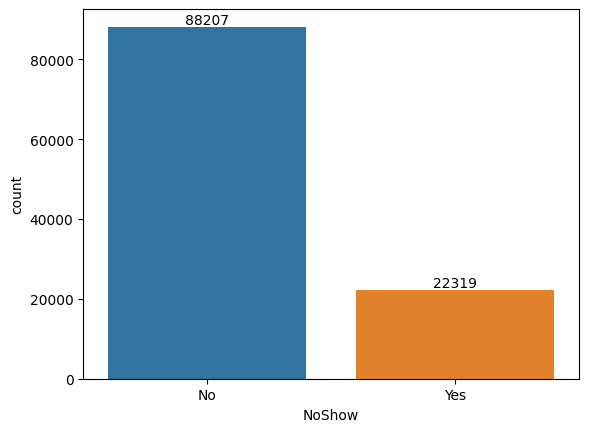

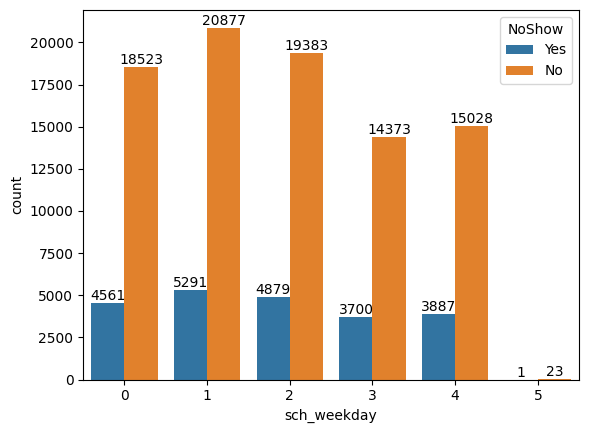

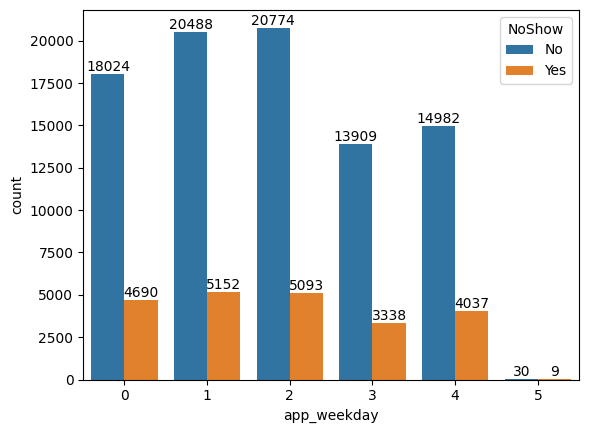

In [30]:
#having a loook into the values of count of each columns and there count in respect to NoShow column

for i in range(0, len(data.columns)):
    temp = data.columns[i]
    print('-'*10,temp,'-'*10)
    print(data[temp].value_counts())
    print((data[temp].value_counts()/data[temp].count())*100)
    if((temp=='ScheduledDay') or (temp=='AppointmentDay') or (temp=='Age')):
        plt.xticks(rotation =90,fontsize =10)
        plt.figure(figsize=(16,5))
    plt.figure(i)
    ax = sns.countplot(data=data, x=temp, hue='NoShow')
    for container in ax.containers:
        ax.bar_label(container)

In [43]:
#data['Gender'].value_counts()
for i in range(0, len(data.columns)):
    temp = data.columns[i]
    if((temp!='ScheduledDay') and (temp!='AppointmentDay') and (temp!='Age')):
        print('-'*10,temp,'-'*10)
        vcgn = data.groupby(temp)['NoShow'].value_counts()
        cgn = data.groupby(temp)['NoShow'].count()
        a= (vcgn/cgn)*100
        print(a)

---------- Gender ----------
Gender  NoShow
F       No        79.685129
        Yes       20.314871
M       No        80.032052
        Yes       19.967948
dtype: float64
---------- Scholarship ----------
Scholarship  NoShow
0            No        80.192645
             Yes       19.807355
1            No        76.263696
             Yes       23.736304
dtype: float64
---------- Hypertension ----------
Hypertension  NoShow
0             No        79.096083
              Yes       20.903917
1             No        82.698041
              Yes       17.301959
dtype: float64
---------- Diabetes ----------
Diabetes  NoShow
0         No        79.636977
          Yes       20.363023
1         No        81.996727
          Yes       18.003273
dtype: float64
---------- Alcoholism ----------
Alcoholism  NoShow
0           No        79.805162
            Yes       20.194838
1           No        79.851190
            Yes       20.148810
dtype: float64
---------- Handicap ----------
Handicap  No

In [31]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,4,4
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,4,4
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,4,4
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,4,4
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,4,4


In [32]:
# base_data['NoShow'] = np.where(base_data.NoShow == 'Yes',1,0)
# df['noshow'] = df['noshow'].replace({'No':0,'Yes':1})
# These two code have similar work to change the value of columns